In [61]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


 Classe
automobile    5000
horse         5000
ship          5000
cat           5000
dog           5000
Name: count, dtype: int64


C:\Users\ntcha\AppData\Local\Temp\ipykernel_31956\3426761983.py:8: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  dict = pickle.load(fo, encoding='bytes')


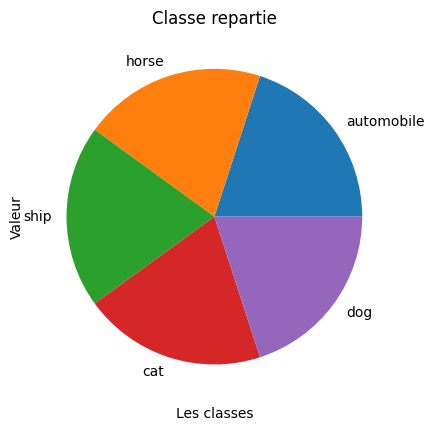

In [ ]:
#batch_1 = unpickle("./cifar-10-batches-py/data_batch_1")
batches_meta = unpickle("./cifar-10-batches-py/batches.meta")
label_names = batches_meta[b'label_names']

image_list = []
label_list = []
filename_list = []

for i in range(1,6):
    batch_file = unpickle(f"./cifar-10-batches-py/data_batch_{i}")
    #Iici data c'est les image de chaque batch que je recupere et les label correspondant.
    data = batch_file[b'data']
    labels = batch_file[b'labels']
    filenames = batch_file[b'filenames']

    tab_label = np.array(labels)
    tab_filenames = np.array(filenames)

    #Filtrons chaque batch donc
    filtrage = (tab_label == 1) | (tab_label == 3) | (tab_label == 5) | (tab_label == 7) | (tab_label == 8)

    image_list.append(data[filtrage])
    label_list.append(tab_label[filtrage])

    for fname in tab_filenames[filtrage]:
        filename_list.append(fname.decode())
        
#on regroupe les images de nos classe recuperer dans un seul tableau ainsi que mes label 
regroup_img = np.concatenate(image_list)
regroup_label = np.concatenate(label_list)

classe_corresp = []
for cl in regroup_label:
    classe = label_names[cl].decode()
    classe_corresp.append(classe)

dataframe = pd.DataFrame({"Identifiant": np.arange(len(regroup_img)),
                          "Label": regroup_label, 
                          "Classe" : classe_corresp })
#print(dataframe)

#Le second data frame je l'ai juste crer pour faire une visualisation perso
dataframe2 = pd.DataFrame({"Identifiant": np.arange(len(regroup_img)),
                          "Label": regroup_label, 
                          "Classe" : classe_corresp,
                          "nom_photo" : filename_list })
#print(dataframe2)

#Point 5 : Visualisation Partie 1:
comptage = dataframe["Classe"].value_counts()
print("\n", comptage)

comptage.plot(kind = "pie", title="Classe repartie", color="red")
plt.xlabel("Repartitions des classes")
plt.ylabel("Valeur")
plt.show()

#Exemples d'images en fait...
# JE SAIS PAS TROP COMMENT FAIRE LA VISUALISATION D'UNE IMAGE POUR LE MOMENT ...






#np1 = 